## 1. Data on tags over time
<p>How can we tell what programming languages and technologies are used by the most people? How about what languages are growing and which are shrinking, so that we can tell which are most worth investing time in?</p>
<p>One excellent source of data is <a href="https://stackoverflow.com/">Stack Overflow</a>, a programming question and answer site with more than 16 million questions on programming topics. By measuring the number of questions about each technology, we can get an approximate sense of how many people are using it. We're going to use open data from the <a href="https://data.stackexchange.com/">Stack Exchange Data Explorer</a> to examine the relative popularity of languages like R, Python, Java and Javascript have changed over time.</p>
<p>Each Stack Overflow question has a <strong>tag</strong>, which marks a question to describe its topic or technology. For instance, there's a tag for languages like <a href="https://stackoverflow.com/tags/r">R</a> or <a href="https://stackoverflow.com/tags/python">Python</a>, and for packages like <a href="https://stackoverflow.com/questions/tagged/ggplot2">ggplot2</a> or <a href="https://stackoverflow.com/questions/tagged/pandas">pandas</a>.</p>

In [106]:
# Importing the required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Setting the directory 
import os
os.chdir('C:/users/nisha/Desktop')

In [3]:
# Loading and inspecting the dataset
df = pd.read_csv('by_tag_year.csv')
df.head()

,year,tag,number,year_total
0,2008,.htaccess,54,58390
1,2008,.net,5910,58390
2,2008,.net-2.0,289,58390
3,2008,.net-3.5,319,58390
4,2008,.net-4.0,6,58390


## 2. Now in fraction format
<p>This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the <code>.htaccess</code> tag in 2008, out of a total of 58390 questions in that year.</p>
<p>Rather than just the counts, we're probably interested in a percentage: the fraction of questions that year that have that tag. So let's add that to the table.</p>

In [4]:
# Adding the fraction column
df['fraction'] = df['number']/df['year_total']

# Viewing the dataframe's first 6 rows
df.head()

,year,tag,number,year_total,fraction
0,2008,.htaccess,54,58390,0.000925
1,2008,.net,5910,58390,0.101216
2,2008,.net-2.0,289,58390,0.004949
3,2008,.net-3.5,319,58390,0.005463
4,2008,.net-4.0,6,58390,0.000103


## 3. Has Python/R been growing or shrinking?

<p>Let's look at whether the fraction of Stack Overflow questions that are about Python/R has been increasing or decreasing over time.</p>

In [148]:
# Filtering for Python tags
python_over_time = df[df['tag']  == 'python']

# Printing the new dataframe
python_over_time.head()

,year,tag,number,year_total,fraction
1794,2008,python,2080,58390,0.035623
4796,2009,python,12906,343868,0.037532
8105,2010,python,27098,694391,0.039024
11615,2011,python,42313,1200551,0.035245
15325,2012,python,64456,1645404,0.039173


In [149]:
# Filtering for R tags
r_over_time = df[df['tag'] == 'r']

# Printing the new dataframe
r_over_time.head()

,year,tag,number,year_total,fraction
1821,2008,r,8,58390,0.000137
4830,2009,r,524,343868,0.001524
8141,2010,r,2270,694391,0.003269
11656,2011,r,5845,1200551,0.004869
15367,2012,r,12221,1645404,0.007427


## 4. Visualizing change over time for R and Python
<p>Visualizing change over time with a line plot.</p>

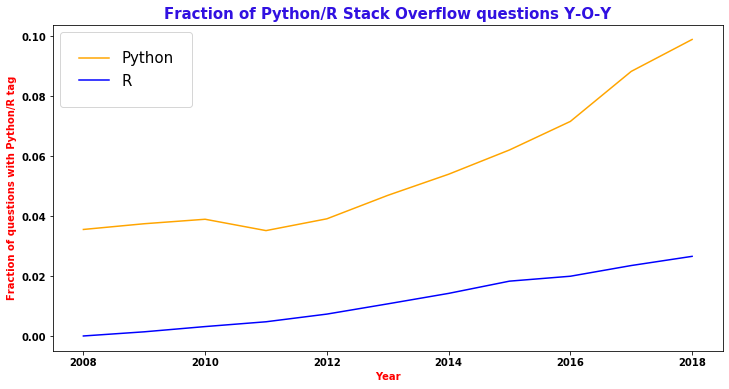

In [310]:
# Creating a line plot of fraction over time
plt.figure(figsize = (12 , 6))
plt.plot(python_over_time['year'] , python_over_time['fraction'] , c = 'orange')
plt.plot(r_over_time['year'] , r_over_time['fraction'] , c = 'blue')
plt.xlabel('Year' , fontweight='bold' , color = 'red' , fontsize = 10)
plt.ylabel('Fraction of questions with Python/R tag' , fontweight='bold' , color = 'red' , fontsize = 10)
plt.title('Fraction of Python/R Stack Overflow questions Y-O-Y'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(["Python", "R"], prop={"size" : 15} , borderpad=1.25)
plt.show();

## 5. How about analysis of popular python libraries ?
<p>Based on that graph, it looks like Python has been growing pretty fast as compared to R in the last decade.</p>
<p>Besides Python , other interesting tags on Stack Overflow are Numpy , Pandas , scikit-learn, gensim and data visualization libraries which are quite popular.</p>
<p>Let's look at various libraries(tags) and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?</p>

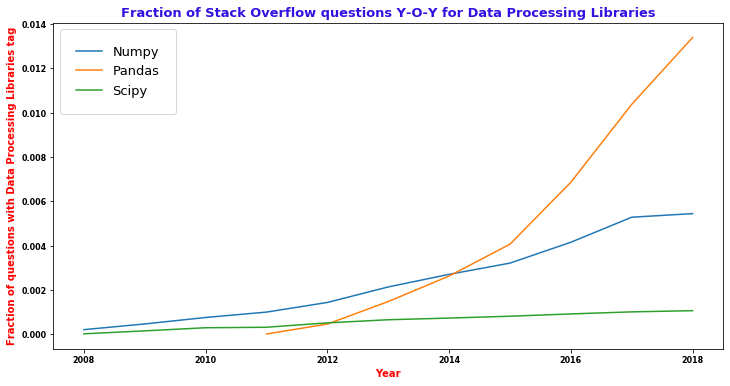

In [321]:
# Creating a line plot of fraction over time for Data Cleaning , Processing and Manipulation Libraries
Py_Data_Processing = df[(df['tag'] == 'numpy') | (df['tag'] == 'scipy') | (df['tag'] == 'pandas')]
Py_Data_Processing = Py_Data_Processing.pivot(index='year', columns='tag', values='fraction')
Py_Data_Processing.plot(figsize = (12 , 6));
plt.xlabel('Year' , fontsize = 10, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with Data Processing Libraries tag' , fontsize = 10 , fontweight='bold' , color = 'red')
plt.title('Fraction of Stack Overflow questions Y-O-Y for Data Processing Libraries'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13)
plt.xticks(fontsize = 8 , fontweight='bold')
plt.yticks(fontsize = 8 , fontweight='bold')
plt.legend(["Numpy", "Pandas" , "Scipy"], prop={"size" : 13} , borderpad=1.25)
plt.show();

The above graph clearly depicts that more no of questions asked on Stack Overflow contains tags on Pandas.This seems to be in line with expectation as Pandas is heavily used for data manipulation.Numpy primalrily used for matrix and array operations comes second and the Scipy for scientific computation comes last. 

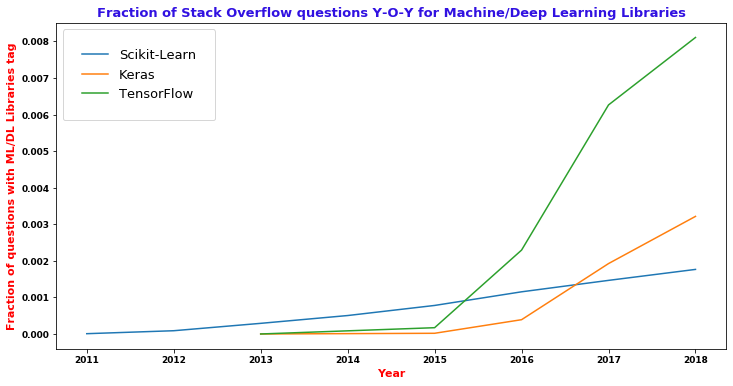

In [329]:
# Creating a line plot of fraction over time for Machine Learning and Deep Learning Libraries 
plt.figure(figsize = (12 , 6))
Py_ML_DL = df[(df['tag'] == 'scikit-learn') | (df['tag'] == 'keras') | (df['tag'] == 'tensorflow')]
sns.lineplot(data=Py_ML_DL, x='year', y='fraction', hue='tag');
plt.xlabel('Year' , fontsize = 11, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with ML/DL Libraries tag' , fontsize = 11 , fontweight='bold' , color = 'red')
plt.title('Fraction of Stack Overflow questions Y-O-Y for Machine/Deep Learning Libraries'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13);
plt.xticks(fontsize = 9 , fontweight='bold')
plt.yticks(fontsize = 9 , fontweight='bold')
plt.legend(["Scikit-Learn", "Keras" , "TensorFlow"], prop={"size" : 13} , borderpad=1.5)
plt.show();

Scikit-Learn seems to show a constant growth depicted by a straight line while TensorFlow and Keras (Deep Learning Libraries) have shown exponential growth 2015 onwards.  

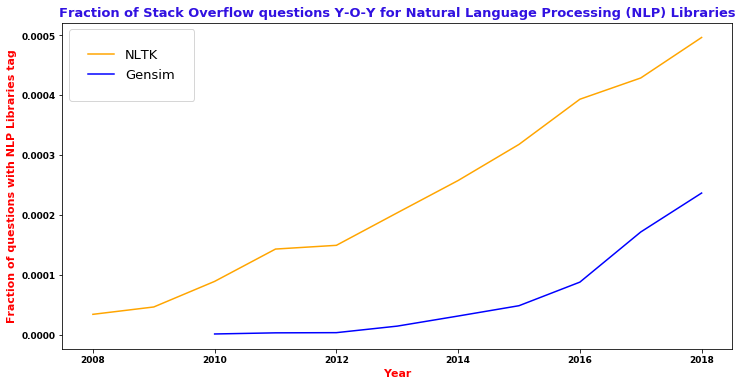

In [330]:
# Creating a line plot of fraction over time for Natural Language Processing Libraries
plt.figure(figsize = (12 , 6))
Py_NLTK = df[df['tag'] == 'nltk'] 
Py_Gensim = df[df['tag'] == 'gensim']
plt.plot(Py_NLTK['year'] , Py_NLTK['fraction'] , c = 'orange' );
plt.plot(Py_Gensim['year'] , Py_Gensim['fraction'] , c = 'blue' )
plt.xlabel('Year' , fontsize = 11, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with NLP Libraries tag' ,  fontsize = 11 , fontweight='bold' , color = 'red')
plt.title('Fraction of Stack Overflow questions Y-O-Y for Natural Language Processing (NLP) Libraries'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13);
plt.xticks(fontsize = 9 , fontweight='bold')
plt.yticks(fontsize = 9 , fontweight='bold')
plt.legend(["NLTK", "Gensim"], prop={"size" : 13} , borderpad=1.5)
plt.show();

NLTK seems to be the preferred one amongst the user as far as the Natural Language Processing Libraries are concerned.

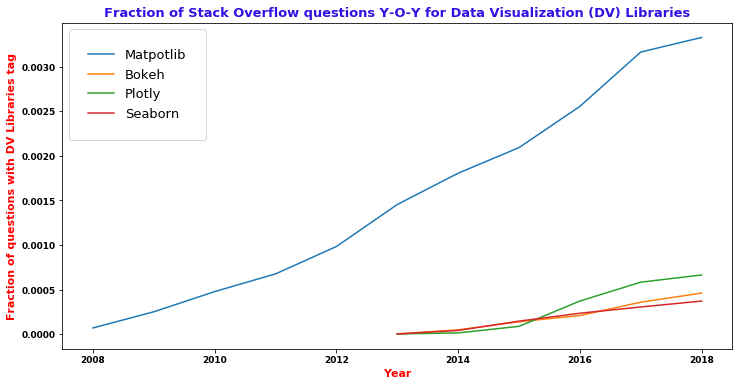

In [331]:
# Creating a line plot of fraction over time for Data Visualization Libraries
plt.figure(figsize = (12 , 6))
Py_Data_Viz = df[(df['tag'] == 'matplotlib') | (df['tag'] == 'seaborn') | (df['tag'] == 'plotly') | (df['tag'] == 'bokeh')]
sns.lineplot(data = Py_Data_Viz , x = 'year' , y = 'fraction' , hue = 'tag');
plt.xlabel('Year' , fontsize = 11, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with DV Libraries tag' ,  fontsize = 11 , fontweight='bold' , color = 'red')
plt.title('Fraction of Stack Overflow questions Y-O-Y for Data Visualization (DV) Libraries'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13);
plt.xticks(fontsize = 9 , fontweight='bold')
plt.yticks(fontsize = 9 , fontweight='bold')
plt.legend(["Matpotlib", "Bokeh" , "Plotly" ,"Seaborn"], prop={"size" : 13} , borderpad=1.5)
plt.show();

Matplotlib is the first choice in the data visualization space and it is followed by Plotly,Bokeh and Seaborn.Personally,I am a bit surprised about seeing the seaborn on last as I tend to like it quike a bit.Maybe the trend has shifted towards it in the past year or so.

## 6. What are the most asked-about tags?

<p>Next interesting thing to know is which tags have the most questions <em>overall</em>, not just within a particular year. Right now, we have several rows for every tag, but we'll be combining them into one. That means we want <code>group_by()</code> and <code>sum()</code> over all the years.</p>
<p>Let's look at tags that have the most questions in history.</p>

In [246]:
# Find total number of questions for each tag
sorted_tags = df.groupby('tag').sum()['number'].sort_values(ascending = False)

# Printing the data frame
pd.DataFrame(sorted_tags).head(10)

,number
tag,
javascript,1632049
java,1425961
c#,1217450
php,1204291
android,1110261
python,970768
jquery,915159
html,755341
c++,574263


## 7. How have large programming languages changed over time?
<p>We've looked at selected tags like Python , R as far the programming languages space is concerned and has seen how they're growing. Let's explore What tags might be <em>shrinking</em>? A good place to start is to plot the tags that we just saw that were the most-asked about of all time, including JavaScript, Java and C#.</p>

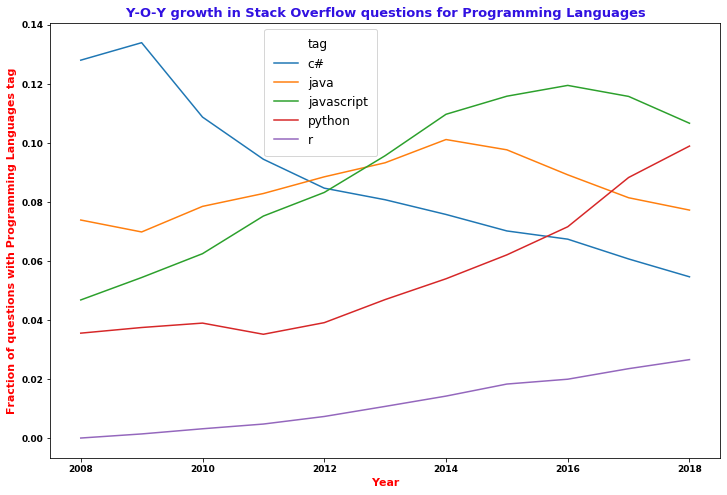

In [376]:
# Creating a line plot of fraction over time for Programming Languages
plt.figure(figsize = (12,8))
Top_3_language_tags = list(sorted_tags.index[0:3])
Top_3_language_tags.extend(['python' , 'r'])
Top_5_language_tags_df = df[df['tag'].apply(lambda x : x in Top_3_language_tags)]
sns.lineplot(data = Top_5_language_tags_df , x = 'year' , y = 'fraction' , hue = 'tag')
plt.xlabel('Year' , fontsize = 11, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with Programming Languages tag' ,  fontsize = 11 , fontweight='bold' , color = 'red')
plt.title('Y-O-Y growth in Stack Overflow questions for Programming Languages'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13);
plt.xticks(fontsize = 9 , fontweight='bold')
plt.yticks(fontsize = 9 , fontweight='bold')
plt.legend(bbox_to_anchor=(0.497, 0.68) , prop={"size" : 12.25} , borderpad=0.75)
plt.show();

Based on the graph above , we've seen a lot of changes in what programming languages are most asked about. C# gets fewer questions than it used to, and Python has grown quite impressively.

## 8. Some more tags!
Let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time.

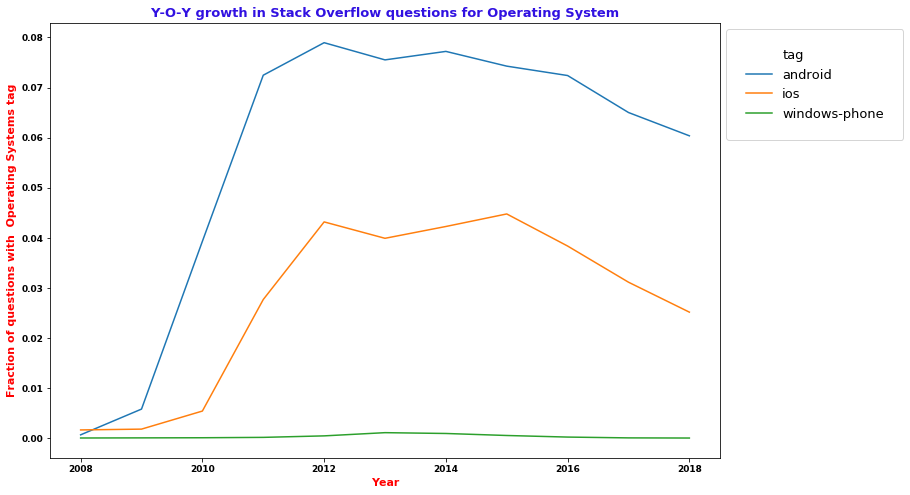

In [333]:
# Creating a line plot of fraction over time for Operating System
plt.figure(figsize = (12,8))
Operating_Systems_df = df[df['tag'].apply(lambda x : x in ['android' , 'ios' , 'windows-phone'])]
sns.lineplot(data = Operating_Systems_df , x = 'year' , y = 'fraction' , hue = 'tag')
plt.xlabel('Year' , fontsize = 11, fontweight='bold' , color = 'red')
plt.ylabel('Fraction of questions with  Operating Systems tag' ,  fontsize = 11 , fontweight='bold' , color = 'red')
plt.title('Y-O-Y growth in Stack Overflow questions for Operating System'
         ,fontweight='bold' , color = '#3111E1' , fontsize = 13);
plt.xticks(fontsize = 9 , fontweight='bold')
plt.yticks(fontsize = 9 , fontweight='bold')
plt.legend(bbox_to_anchor=(1, 1) , prop={"size" : 13} , borderpad=1.5)
plt.show();